In [1]:
from sklearn.datasets import load_digits 
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.models import Model

import warnings
warnings.filterwarnings('ignore')

2023-05-24 20:14:58.192640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 20:14:58.414921: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-24 20:14:58.414939: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-24 20:14:59.503349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

# One-hot encode the labels because softmax is used in the model
y = to_categorical(y)

# Normalize the input
X = X / X.max()
# X.max(), X.min()

In [3]:
y[1]
# X.shape

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

[0.7, 0.2, 0, 0, 0.05]

In [4]:
model = Sequential()

model.add(Dense(120, activation='relu', input_shape=(64,)))
model.add(Dense(120, activation='relu'))
# There are 10 classes in the digits data set
model.add(Dense(10, activation='softmax'))


2023-05-24 20:15:00.727839: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-24 20:15:00.727880: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-24 20:15:00.727916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edgar): /proc/driver/nvidia/version does not exist
2023-05-24 20:15:00.728430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               7800      
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 10)                1210      
                                                                 
Total params: 23,530
Trainable params: 23,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
45/45 [==============================] - 1s 6ms/step - loss: 1.6682 - accuracy: 0.6180 - val_loss: 1.0288 - val_accuracy: 0.8056
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.9095 - val_loss: 0.5376 - val_accuracy: 0.8417
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9422 - val_loss: 0.4448 - val_accuracy: 0.8750
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9638 - val_loss: 0.3769 - val_accuracy: 0.8806
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9687 - val_loss: 0.3632 - val_accuracy: 0.8917
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9770 - val_loss: 0.3363 - val_accuracy: 0.8833
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9833 - val_loss: 0.3279 - val_accuracy: 0.9056
Epoch 8/20
45/45 [==

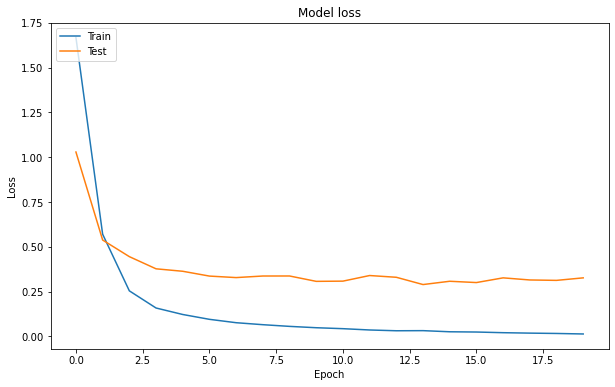

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')
plt.show()



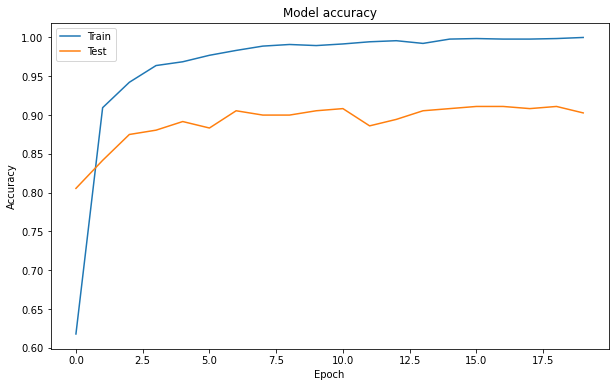

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')


In [10]:
inputs = Input(shape=(64,))

dense_layer1 = Dense(64, activation='relu')(inputs)
dense_layer2 = Dense(32, activation='relu')(dense_layer1)
outputs = Dense(10, activation='softmax')(dense_layer2)

model_f = Model(inputs=inputs, outputs=outputs)
model_f.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_f.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_f = model_f.fit(
    X, y, validation_split=0.2, epochs=10, batch_size=32
)

Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 2.1161 - accuracy: 0.3570 - val_loss: 1.8399 - val_accuracy: 0.5667
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 1.4832 - accuracy: 0.7203 - val_loss: 1.2435 - val_accuracy: 0.7306
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.8796 - val_loss: 0.8524 - val_accuracy: 0.7778
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.9228 - val_loss: 0.6310 - val_accuracy: 0.8583
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9408 - val_loss: 0.5364 - val_accuracy: 0.8639
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9534 - val_loss: 0.4645 - val_accuracy: 0.8694
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9638 - val_loss: 0.4260 - val_accuracy: 0.8806
Epoch 8/10
45/45 [==

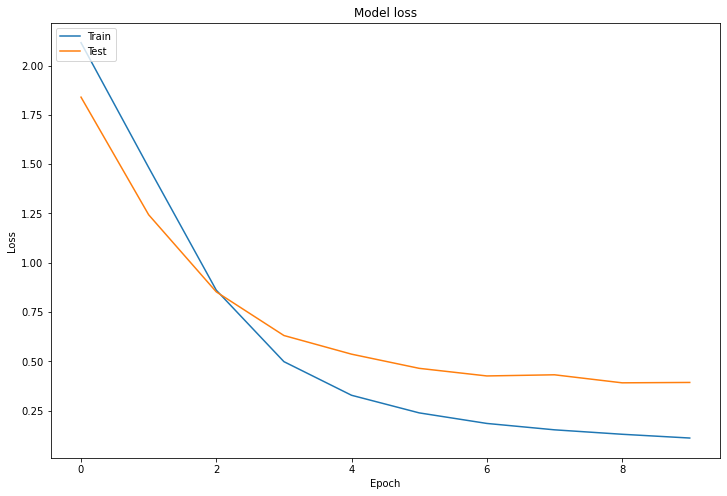

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history_f.history['loss'], label='Train')
ax.plot(history_f.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')


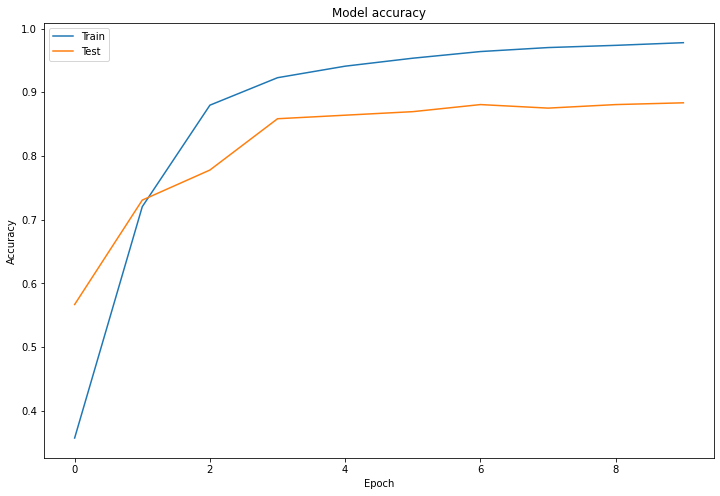

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history_f.history['accuracy'], label='Train')
ax.plot(history_f.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')


$$L = - \sum y * log(\hat{y})$$
Here, y_true is a vector of true target values (which will be one-hot encoded, so for our example it would be [1,0,0] for cat, [0,1,0] for dog, and [0,0,1] for bird), y_pred is a vector of predicted probabilities output by the model (like [0.7, 0.2, 0.1]